In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import ease_of_live_scripts as es
from scipy import optimize as fit
from pprint import *
import seaborn as sbs
sbs.set()

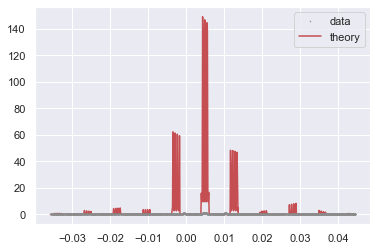

s:0.0010047538020737424
A:0.13253301226437722
z:0.854830652066991
d:3.9986411909714365e-05
wl:6.327272934910918e-07
L:7.000610237170507e-05
n:500.0003910595942
offset:0.005000213714700907
R^2:-6178.455078007227


In [38]:
pname=['s', 'A', 'z', 'd', 'wl', 'L', 'n', 'offset']
z=0.855
d=4.0e-5
L=7.0e-5
A=50
wl=(6.328*(10**(-7)))
n=500
offset=+0.005
s=0.001
def model_integrate(xdata,model,s,*args):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.sum(model(np.linspace(xdata[i]-s,xdata[i]+s),*args))
    return ydata
def newmodel(x,s,*args):
    return model_integrate(x,es.n_slits_model,s,*args)

data=es.read('exp1125/original parameters/10 lines per millimiters','sweep2.txt')
xdata=z*np.sin(np.deg2rad((es.volt_to_angle(data['angle'])))) #x data agusted for distortion
ydata=-data['power']
plt.plot(xdata,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata,ydata,[s, A, z, d, wl, L, n, offset],
                         bounds=((0     ,0     ,z-0.001*z,d-0.001*d,wl-wl*0.001,L-L*0.001,n-100,-np.inf),
                                 (1     ,np.inf,z+0.001*z,d+0.001*d,wl+wl*0.001,L+L*0.001,n+100,np.inf)))
plt.plot(xdata,newmodel(xdata,popt[0],*popt[1:]),zorder=1,color=sbs.color_palette()[3])
# plt.plot(xdata,newmodel(xdata,s,*[A, z, d, wl, L, n, offset]),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata,ydata,newmodel,popt)))